In [0]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank-additional-full.csv to bank-additional-full.csv
User uploaded file "bank-additional-full.csv" with length 4928744 bytes


In [3]:
df = pd.read_csv("bank-additional-full.csv")
pd.options.display.max_columns = 2000
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
# Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. 
# LabelEncoder encode labels with value between 0 and n_classes-1

le = preprocessing.LabelEncoder()
        
df.pdays = le.fit_transform(df.pdays)
df.default = le.fit_transform(df.default)               
df.day_of_week = le.fit_transform(df.day_of_week)         
df.month = le.fit_transform(df.month)     
df.contact = le.fit_transform(df.contact)
df.duration = le.fit_transform(df.duration)        
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)
df.y = le.fit_transform(df.y)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
df.shape

(41188, 21)

In [0]:
X = df.iloc[:,0:20]

In [8]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0


In [0]:
y = df.iloc[:,-1]

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [0]:
#80/20 train/test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) 

In [12]:
x_train.shape, y_train.shape


((32950, 20), (32950,))

In [13]:
x_test.shape, y_test.shape


((8238, 20), (8238,))

### Modeling with raw data

##### Training the model
We will make use of different classification algorithms to train this data set and will record the accuracy on test set.

#### Logistic Regression

In [0]:
LR=LogisticRegression(penalty='l2', max_iter=1000)

In [15]:
LR.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
LR_pred=LR.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, LR_pred)

0.9170915270696771

In [18]:
LR_pred

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, LR_pred)
print(confusion_matrix)

[[7110  209]
 [ 474  445]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.68      0.48      0.57       919

   micro avg       0.92      0.92      0.92      8238
   macro avg       0.81      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



In [0]:
# roc
# auc

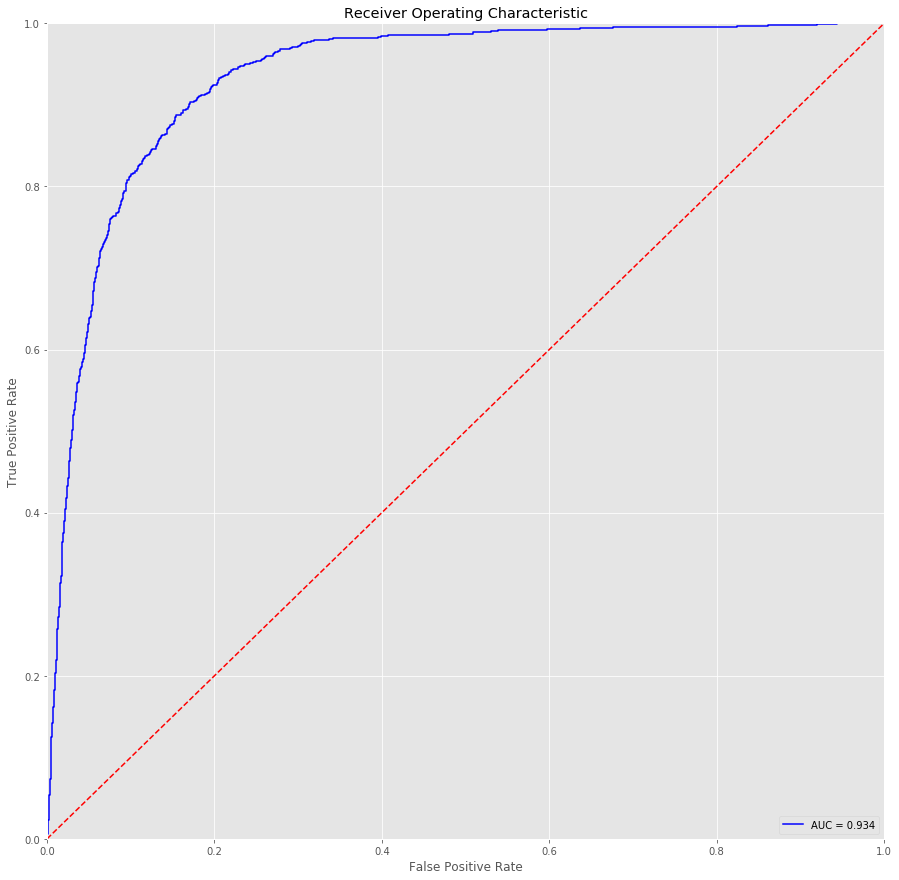

In [22]:
from sklearn.metrics import roc_curve, auc

y_pred_sample_score = LR.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Support Vector Machine (SVM)

In [0]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')

In [24]:
SVM.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
SVM_pred = SVM.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, SVM_pred)

0.9051954357853847

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, SVM_pred)
print(confusion_matrix)

[[6952  367]
 [ 414  505]]


In [28]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7319
           1       0.58      0.55      0.56       919

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.76      0.75      0.76      8238
weighted avg       0.90      0.91      0.90      8238



In [0]:
# roc
# auc


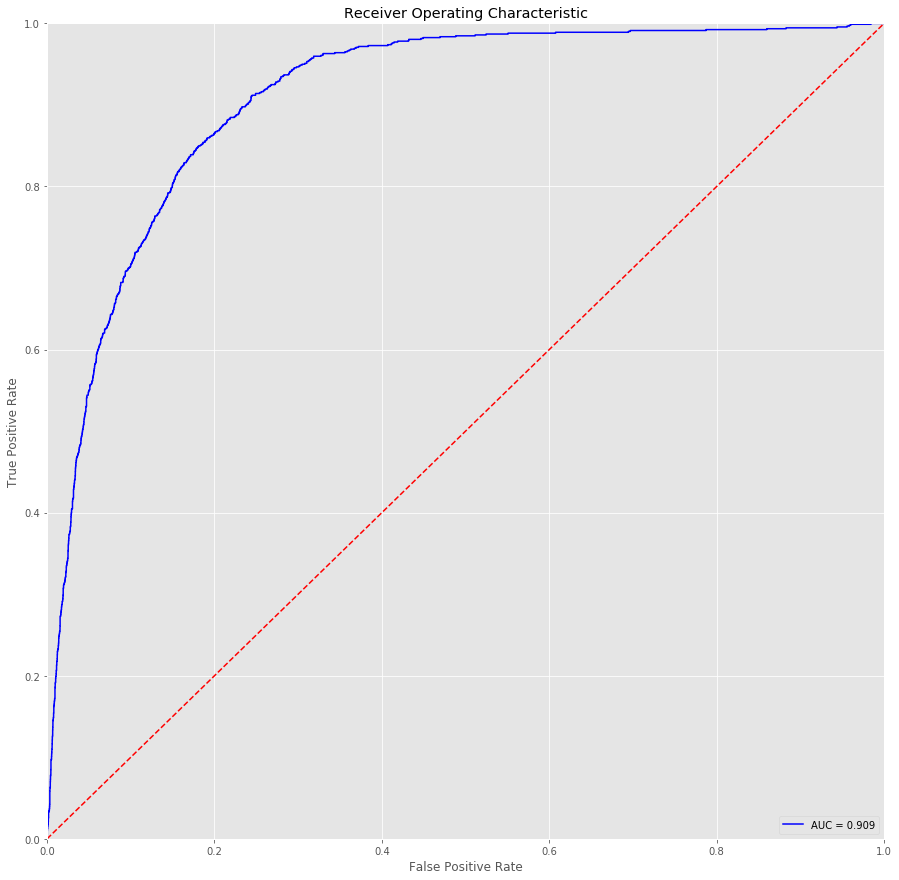

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_sample_score = SVM.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Niave Bayesan

In [0]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [31]:
NB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
NB_pred = NB.predict(x_test)

In [33]:
NB_pred

array([0, 0, 0, ..., 1, 0, 1])

In [34]:
accuracy_score(y_test, NB_pred)

0.8502063607671765

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, NB_pred)
print(confusion_matrix)

[[6407  912]
 [ 322  597]]


In [36]:
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7319
           1       0.40      0.65      0.49       919

   micro avg       0.85      0.85      0.85      8238
   macro avg       0.67      0.76      0.70      8238
weighted avg       0.89      0.85      0.87      8238



In [0]:
#roc and AUC

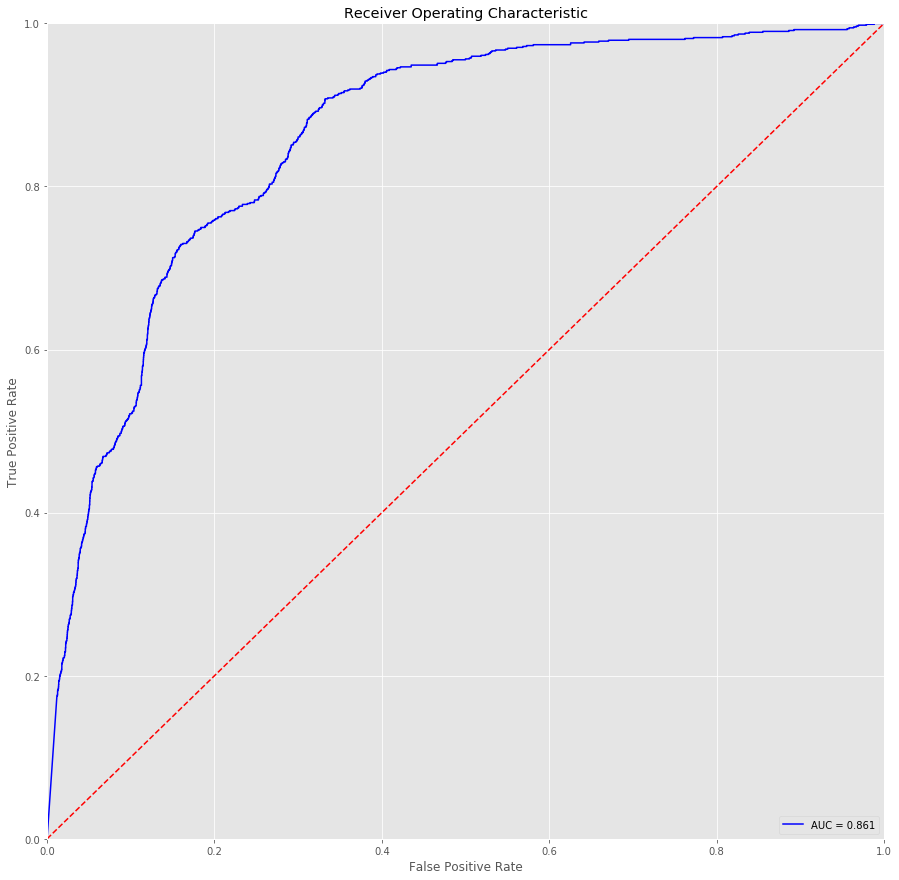

In [38]:
from sklearn.metrics import roc_curve, auc

y_pred_sample_score = NB.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()

In [40]:
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [0]:
LDA_pred = LDA.predict(x_test)

In [42]:
accuracy_score(y_test, LDA_pred)

0.9151493080844866

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, LDA_pred)
print(confusion_matrix)

[[7020  299]
 [ 400  519]]


In [44]:
print(classification_report(y_test, LDA_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7319
           1       0.63      0.56      0.60       919

   micro avg       0.92      0.92      0.92      8238
   macro avg       0.79      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



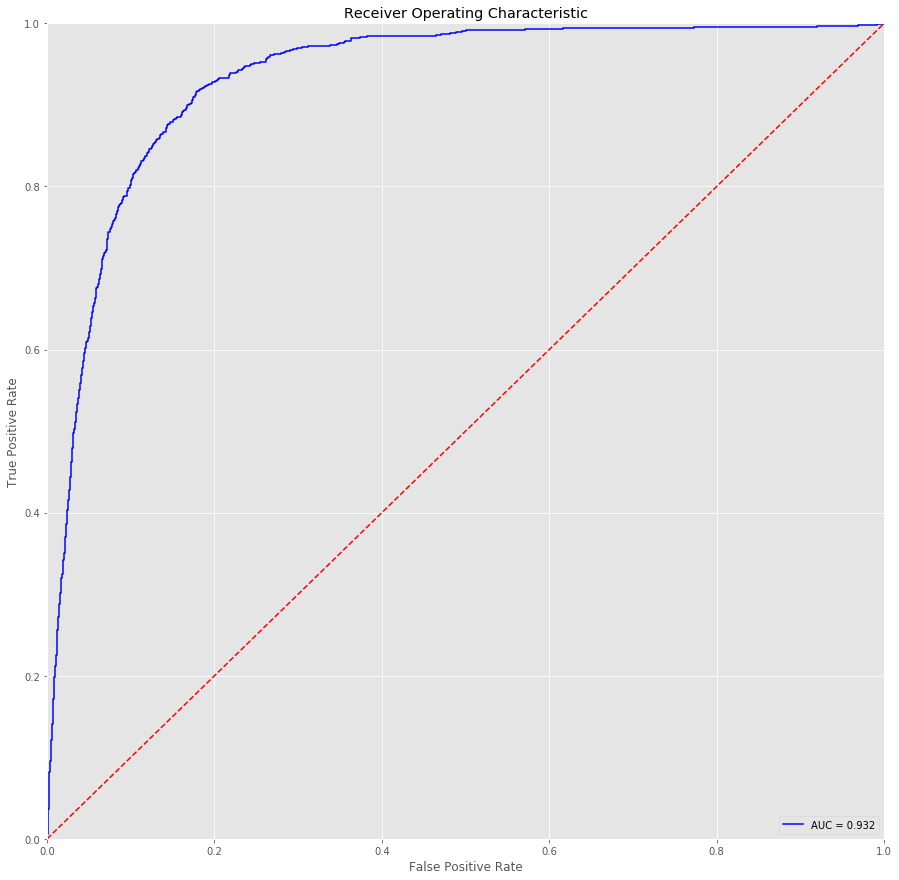

In [45]:
from sklearn.metrics import roc_curve, auc

y_pred_sample_score = LDA.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100)

In [47]:
RFC.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
RFC_pred = RFC.predict(x_test)

In [49]:
accuracy_score(y_test, RFC_pred)

0.9197620781743141

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, RFC_pred)
print(confusion_matrix)

[[7074  245]
 [ 416  503]]


In [51]:
print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7319
           1       0.67      0.55      0.60       919

   micro avg       0.92      0.92      0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.91      0.92      0.92      8238



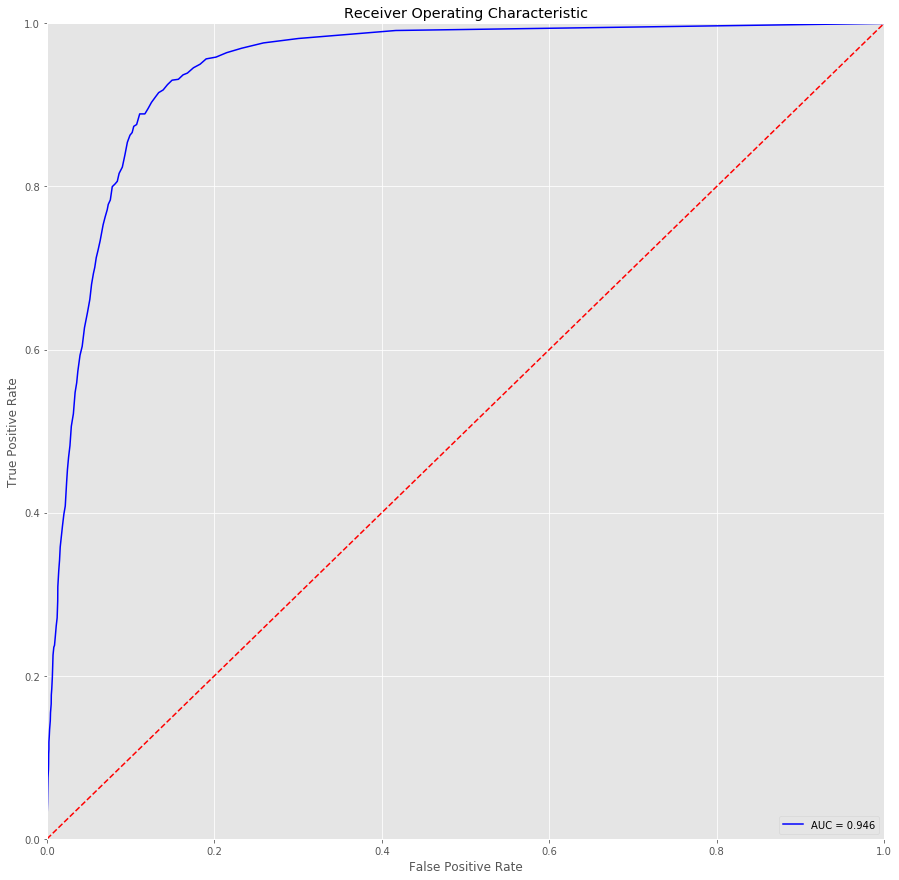

In [52]:
from sklearn.metrics import roc_curve, auc

y_pred_sample_score = RFC.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Neural Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(10, input_dim=20, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [0]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
32950/32950 [==============================] - 2s 49us/step - loss: 0.4409 - acc: 0.8871
Epoch 2/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3542 - acc: 0.8871
Epoch 3/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3527 - acc: 0.8871
Epoch 4/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 5/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3527 - acc: 0.8871
Epoch 6/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 7/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 8/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 9/10
32950/32950 [==============================] - 1s 24us/step - loss: 0.3527 - acc: 0.8871
Epoch 10/10
32950/32950 [===========================

Epoch 1/10
32950/32950 [==============================] - 1s 35us/step - loss: 0.5478 - acc: 0.7322
Epoch 2/10
32950/32950 [==============================] - 1s 25us/step - loss: 0.3615 - acc: 0.8871
Epoch 3/10
32950/32950 [==============================] - 1s 25us/step - loss: 0.3529 - acc: 0.8871
Epoch 4/10
32950/32950 [==============================] - 1s 24us/step - loss: 0.3526 - acc: 0.8871
Epoch 5/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 6/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 7/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 8/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 9/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3526 - acc: 0.8871
Epoch 10/10
32950/32950 [==============================] - 1s 21us/step - loss: 0.3527 - acc: 0.8871

In [0]:
scores = model.evaluate(np.array(x_test), np.array(y_test))

8238/8238 [==============================] - 0s 38us/step


In [0]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



acc: 88.84%

acc: 88.84%


### QDA

In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA=QuadraticDiscriminantAnalysis()

In [54]:
QDA.fit(x_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [0]:
QDA_pred = QDA.predict(x_test)

In [56]:
accuracy_score(y_test, QDA_pred)

0.8821315853362467

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, QDA_pred)
print(confusion_matrix)

[[6673  646]
 [ 325  594]]


In [58]:
print(classification_report(y_test, QDA_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7319
           1       0.48      0.65      0.55       919

   micro avg       0.88      0.88      0.88      8238
   macro avg       0.72      0.78      0.74      8238
weighted avg       0.90      0.88      0.89      8238



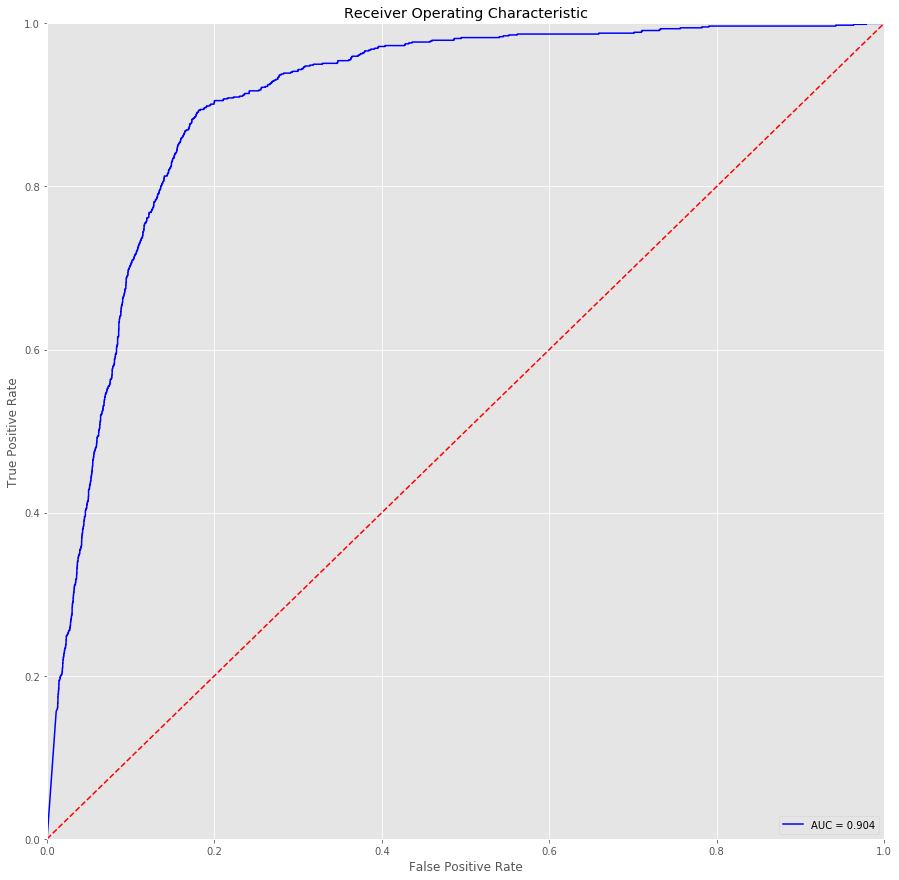

In [59]:
from sklearn.metrics import roc_curve, auc

y_pred_sample_score = QDA.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## All in one Curve

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

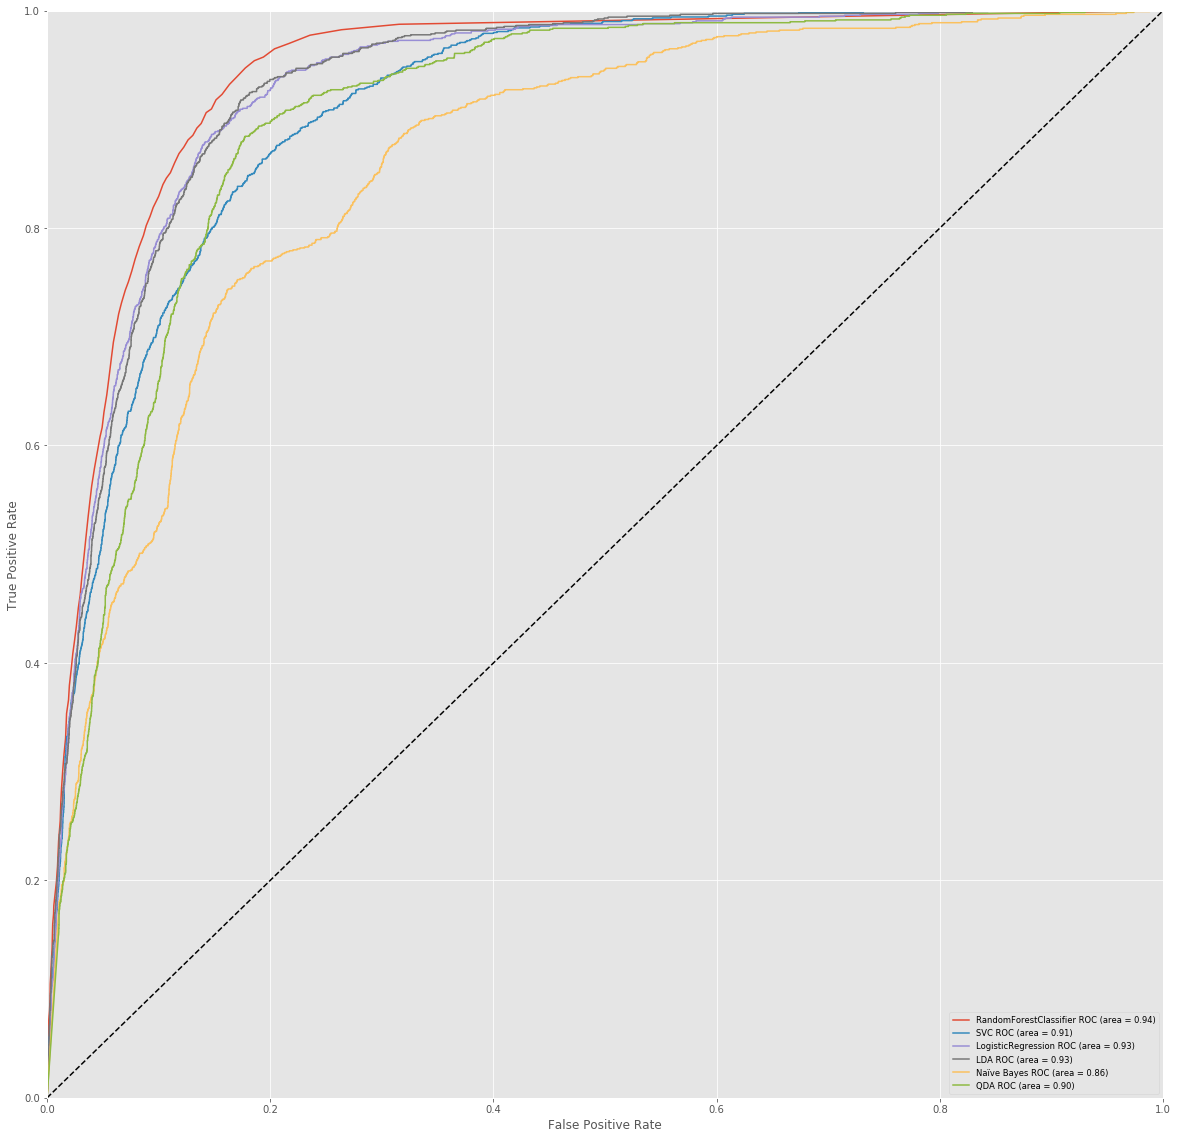

In [60]:
# ROC
roc_train_all, roc_test_all, roc_train_all_class, roc_test_all_class = model_selection.train_test_split(X, y, test_size=0.25) 
roc_train_best, roc_test_best, roc_train_best_class, roc_test_best_class = model_selection.train_test_split(X, y, test_size=0.25) 

models = [
    
    {
        'label' : 'RandomForestClassifier',
        'model': RFC,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },
   
    {
        'label' : 'SVC',
        'model': SVM,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },        
   
    {
        'label' : 'LogisticRegression',
        'model': LR,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    
    },  
    {
        'label' : 'LDA',
        'model': LDA,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    } 
    ,  
    {
        'label' : 'Naïve Bayes',
        'model': NB,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    } 
    ,  
    {
        'label' : 'QDA',
        'model': QDA,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    }
]


plt.clf()
plt.figure(figsize=(20,20))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

In [0]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

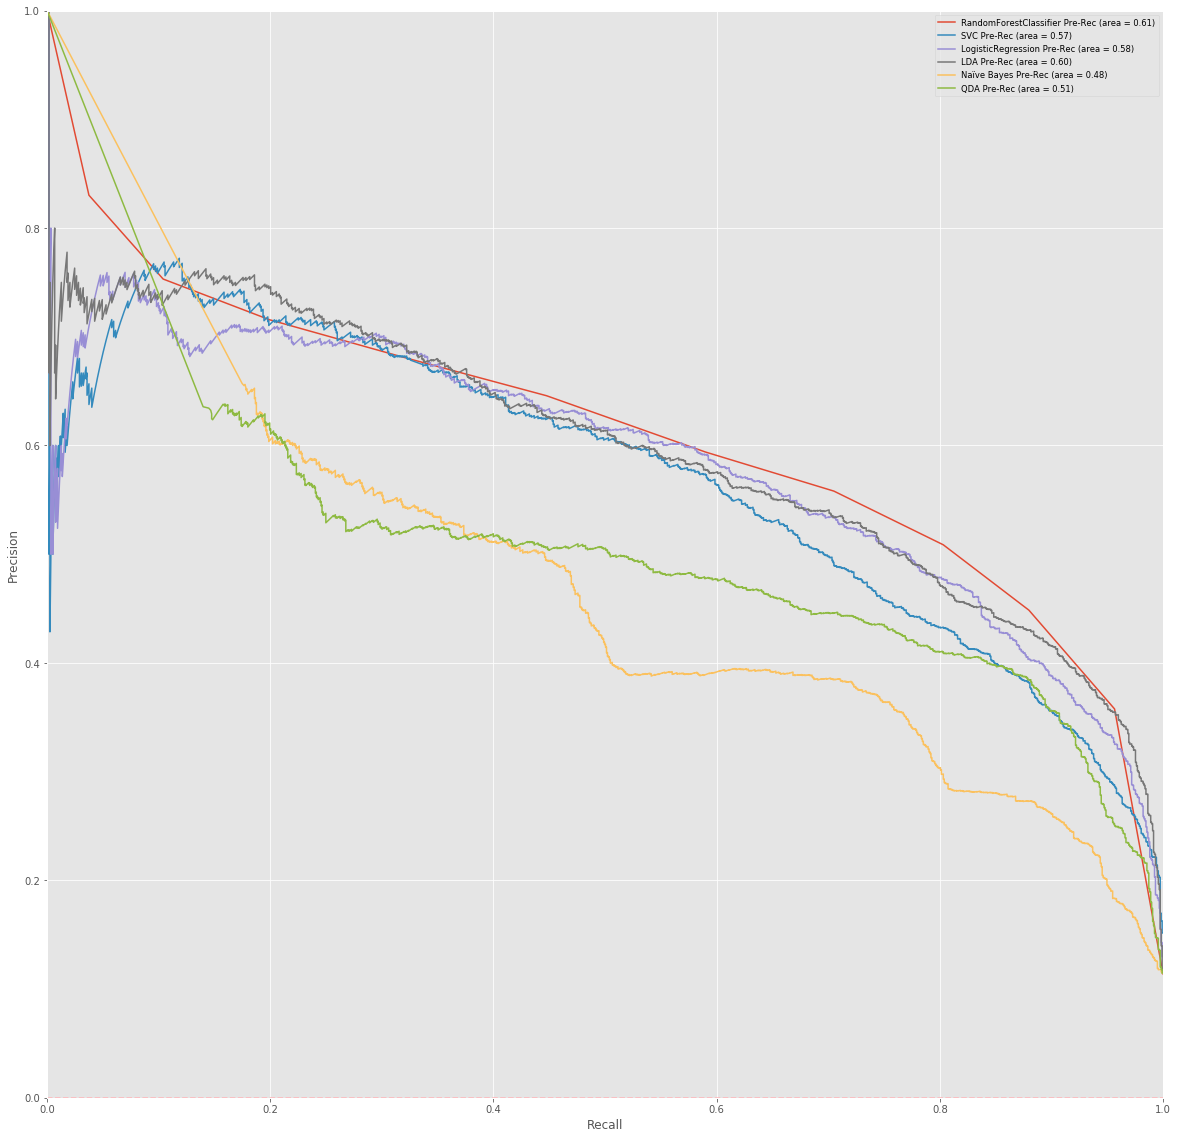

In [0]:
from sklearn.metrics import roc_curve, auc

# Prec-Recall Curve
PR_train_all, PR_test_all, PR_train_all_class, PR_test_all_class = model_selection.train_test_split(X, y, test_size=0.25) 
PR_train_best, PR_test_best, PR_train_best_class, PR_test_best_class = model_selection.train_test_split(X, y, test_size=0.25) 

models = [
    
    {
        'label' : 'RandomForestClassifier',
        'model': RFC,
        'PR_train': PR_train_best,
        'PR_test': PR_test_best,
        'PR_train_class': PR_train_best_class,        
        'PR_test_class': PR_test_best_class,        
    },
   
    {
        'label' : 'SVC',
        'model': SVM,
        'PR_train': PR_train_best,
        'PR_test': PR_test_best,
        'PR_train_class': PR_train_best_class,        
        'PR_test_class': PR_test_best_class,        
    },        
   
    {
        'label' : 'LogisticRegression',
        'model': LR,
        'PR_train': PR_train_best,
        'PR_test': PR_test_best,
        'PR_train_class': PR_train_best_class,        
        'PR_test_class': PR_test_best_class,      
    
    },  
    {
        'label' : 'LDA',
        'model': LDA,
        'PR_train': PR_train_best,
        'PR_test': PR_test_best,
        'PR_train_class': PR_train_best_class,        
        'PR_test_class': PR_test_best_class,       
    } 
    ,  
    {
        'label' : 'Naïve Bayes',
        'model': NB,
        'PR_train': PR_train_best,
        'PR_test': PR_test_best,
        'PR_train_class': PR_train_best_class,        
        'PR_test_class': PR_test_best_class,        
    } 
    ,  
    {
        'label' : 'QDA',
        'model': QDA,
        'PR_train': PR_train_best,
        'PR_test': PR_test_best,
        'PR_train_class': PR_train_best_class,        
        'PR_test_class': PR_test_best_class,       
    }
]


plt.clf()
plt.figure(figsize=(20,20))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['PR_train'], m['PR_train_class']).predict_proba(m['PR_test'])
    precision, recall, thresholds = precision_recall_curve(m['PR_test_class'],probas[:, 1])  
    PR_auc  = auc( recall, precision )
    plt.plot(recall, precision, label='%s Pre-Rec (area = %0.2f)' % (m['label'], PR_auc))

plt.plot([0, 1], [0.0, 0.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=0, fontsize='small')
plt.show()


No handles with labels found to put in legend.


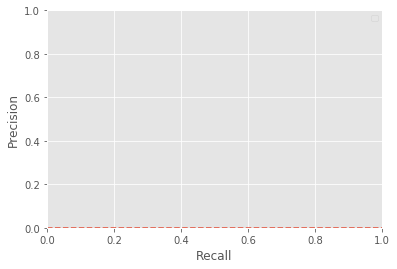

In [0]:
plt.plot([0, 1], [0.0, 0.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=0, fontsize='small')
plt.show()
